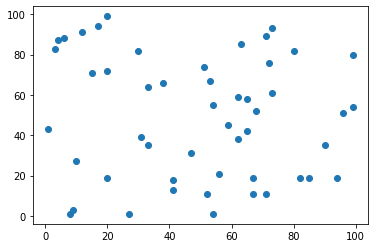

[[0, 16.492422502470642, 66.09841147864296, 61.09828148156051, 111.25196627475849, 42.7551166528639, 37.013511046643494, 43.60045871318328, 38.05259518088089, 76.92203845452875, 73.10950690573696, 89.80534505250787, 24.351591323771842, 63.12685640834652, 96.04686356149273, 61.204574992397426, 86.49277426467485, 37.21558813185679, 12.0, 46.95742752749558, 27.0, 64.53681120105021, 42.01190307520001, 75.8023746329889, 32.0624390837628, 73.68174807915459, 72.91776189653656, 69.3757882838098, 108.97706180660222, 84.38009243891595, 51.22499389946279, 107.48953437428223, 43.86342439892262, 28.160255680657446, 109.12378292562992, 63.06346010171025, 53.81449618829484, 53.009433122794285, 74.0, 9.0, 111.8257573191436, 87.86353054595519, 91.02197536858887, 53.33854141237835, 48.507731342539614, 35.35533905932738, 48.60041152089147, 69.81403870282824, 112.8007092176286, 94.57801012920498], [16.492422502470642, 0, 59.135437767890075, 44.77722635447622, 99.36297097007517, 44.94441010848846, 25.96150

In [56]:
#k center problem with outliers
import numpy as np
import matplotlib.pyplot as plt
import math
import itertools


class KCenterProblemWithOutliers():
  def __init__(self, x_input, y_input) -> None:
    self.x_input, self.y_input = x_input, y_input
    self.NUM_INPUTS = len(x_input)
    self.dists = [[0 for _ in range(self.NUM_INPUTS)] for _ in range(self.NUM_INPUTS)]

  def compute_dists(self):
    for r in range(self.NUM_INPUTS):
      for c in range(self.NUM_INPUTS):
        if not r == c:
          self.dists[r][c] = math.sqrt((self.x_input[r] - self.x_input[c])**2 + (self.y_input[r] - self.y_input[c])**2)

  def plot_points(self):
    plt.scatter(x=self.x_input, y=self.y_input)
    plt.show()
    
    self.compute_dists()

  def select_samples():
    return []

if __name__ == '__main__' :
  min_val, max_val, num_vals = 0, 100, 50

  x_input = np.random.randint(min_val, max_val, num_vals).tolist()
  y_input = np.random.randint(min_val, max_val, num_vals).tolist()
  # x_input = [0,1,2,3,4,5,6]
  # y_input = [1,1,1,1,1,1,1]

  query = KCenterProblemWithOutliers(x_input, y_input)
  query.plot_points()